In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import json

In [2]:
df = pd.read_csv('arandanos.csv')

In [3]:
df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,20201124_092900.jpg,2833744,{},342,0,"{""name"":""rect"",""x"":40,""y"":309,""width"":47,""heig...","{""class"":""Arandano Maduro""}"
1,20201124_092900.jpg,2833744,{},342,1,"{""name"":""rect"",""x"":242,""y"":802,""width"":30,""hei...","{""class"":""Arandano Maduro""}"
2,20201124_092900.jpg,2833744,{},342,2,"{""name"":""rect"",""x"":242,""y"":839,""width"":39,""hei...","{""class"":""Arandano Maduro""}"
3,20201124_092900.jpg,2833744,{},342,3,"{""name"":""rect"",""x"":358,""y"":975,""width"":25,""hei...","{""class"":""Arandano Pinton""}"
4,20201124_092900.jpg,2833744,{},342,4,"{""name"":""rect"",""x"":388,""y"":951,""width"":29,""hei...","{""class"":""Arandano Pinton""}"


In [4]:
df[['region_attributes']].value_counts()

region_attributes          
{"class":"Arandano Maduro"}    5141
{"class":"Arandano Pinton"}    3197
{"class":"Arandano Verde"}     2789
{}                              163
dtype: int64

In [5]:
# Drop elements without class and unused columns
drop_index = df[ (df['region_attributes'] == '{"class":undefined}') | (df['region_attributes'] == '{}')  ].index
df.drop(drop_index, inplace = True)
df.drop(['file_attributes', 'file_size', 'region_count', 'region_id'], axis=1, inplace=True)

In [6]:
df[['region_attributes']].value_counts()

region_attributes          
{"class":"Arandano Maduro"}    5141
{"class":"Arandano Pinton"}    3197
{"class":"Arandano Verde"}     2789
dtype: int64

In [7]:
# Replace label text with correct format
df['region_attributes'].replace({
    '{"class":"Arandano Maduro"}': 'Arandano Maduro',
    '{"class":"Arandano Verde"}': 'Arandano Verde',
    '{"class":"Arandano Pinton"}': 'Arandano Pinton'
                                 }, inplace = True)

In [8]:
# Add new columns
df['xmin'] = ''    # Top Left
df['ymin'] = ''    # Top Left
df['xmax'] = ''    # Bottom Right
df['ymax'] = ''    # Bottom Right

In [9]:
df.head()

,filename,region_shape_attributes,region_attributes,xmin,ymin,xmax,ymax
0,20201124_092900.jpg,"{""name"":""rect"",""x"":40,""y"":309,""width"":47,""heig...",Arandano Maduro,,,,
1,20201124_092900.jpg,"{""name"":""rect"",""x"":242,""y"":802,""width"":30,""hei...",Arandano Maduro,,,,
2,20201124_092900.jpg,"{""name"":""rect"",""x"":242,""y"":839,""width"":39,""hei...",Arandano Maduro,,,,
3,20201124_092900.jpg,"{""name"":""rect"",""x"":358,""y"":975,""width"":25,""hei...",Arandano Pinton,,,,
4,20201124_092900.jpg,"{""name"":""rect"",""x"":388,""y"":951,""width"":29,""hei...",Arandano Pinton,,,,


In [10]:
# Fix index (changed because of dropped elements)
df.reset_index(drop=True, inplace=True)

In [11]:
df

,filename,region_shape_attributes,region_attributes,xmin,ymin,xmax,ymax
0,20201124_092900.jpg,"{""name"":""rect"",""x"":40,""y"":309,""width"":47,""heig...",Arandano Maduro,,,,
1,20201124_092900.jpg,"{""name"":""rect"",""x"":242,""y"":802,""width"":30,""hei...",Arandano Maduro,,,,
2,20201124_092900.jpg,"{""name"":""rect"",""x"":242,""y"":839,""width"":39,""hei...",Arandano Maduro,,,,
3,20201124_092900.jpg,"{""name"":""rect"",""x"":358,""y"":975,""width"":25,""hei...",Arandano Pinton,,,,
4,20201124_092900.jpg,"{""name"":""rect"",""x"":388,""y"":951,""width"":29,""hei...",Arandano Pinton,,,,
...,...,...,...,...,...,...,...
11122,20201124_093147.jpg,"{""name"":""rect"",""x"":1727,""y"":2394,""width"":44,""h...",Arandano Verde,,,,
11123,20201124_093147.jpg,"{""name"":""rect"",""x"":1710,""y"":2367,""width"":46,""h...",Arandano Verde,,,,
11124,20201124_093147.jpg,"{""name"":""rect"",""x"":2179,""y"":2645,""width"":45,""h...",Arandano Verde,,,,
11125,20201124_093147.jpg,"{""name"":""rect"",""x"":2121,""y"":2668,""width"":46,""h...",Arandano Verde,,,,


In [12]:
# Extract region shape and add bounding box values
n = 0
widths = 0
heights = 0

for string in df['region_shape_attributes']:
    rect = json.loads(string)
    df.at[n, 'xmin'] = rect['x']
    df.at[n, 'ymin'] = rect['y']
    df.at[n, 'xmax'] = (rect['x'] + rect['width'])
    df.at[n, 'ymax'] = (rect['y'] + rect['height'])
    n = n+1

In [13]:
df.drop(['region_shape_attributes'], axis=1, inplace=True)
df.tail()

,filename,region_attributes,xmin,ymin,xmax,ymax
11122,20201124_093147.jpg,Arandano Verde,1727,2394,1771,2428
11123,20201124_093147.jpg,Arandano Verde,1710,2367,1756,2406
11124,20201124_093147.jpg,Arandano Verde,2179,2645,2224,2691
11125,20201124_093147.jpg,Arandano Verde,2121,2668,2167,2710
11126,20201124_093147.jpg,Arandano Pinton,1700,3309,1739,3353


In [14]:
df.rename(columns={'region_attributes': 'label'}, inplace=True)
cols = ['filename', 'xmin', 'ymin', 'xmax', 'ymax', 'label']
df = df[cols]
df.head()

,filename,xmin,ymin,xmax,ymax,label
0,20201124_092900.jpg,40,309,87,362,Arandano Maduro
1,20201124_092900.jpg,242,802,272,835,Arandano Maduro
2,20201124_092900.jpg,242,839,281,876,Arandano Maduro
3,20201124_092900.jpg,358,975,383,1003,Arandano Pinton
4,20201124_092900.jpg,388,951,417,986,Arandano Pinton


In [15]:
n = 0
for string in df['filename']:
    df.at[n, 'filename'] = 'images/' + df.at[n, 'filename']
    n = n+1

In [16]:
print(df.shape)
df.tail()

(11127, 6)


,filename,xmin,ymin,xmax,ymax,label
11122,images/20201124_093147.jpg,1727,2394,1771,2428,Arandano Verde
11123,images/20201124_093147.jpg,1710,2367,1756,2406,Arandano Verde
11124,images/20201124_093147.jpg,2179,2645,2224,2691,Arandano Verde
11125,images/20201124_093147.jpg,2121,2668,2167,2710,Arandano Verde
11126,images/20201124_093147.jpg,1700,3309,1739,3353,Arandano Pinton


In [17]:
df.to_csv('Arandanos_Dataset_Format.csv', index=False)

In [18]:
df['x_size'] = df['xmax'] - df['xmin']
df['y_size'] = df['ymax'] - df['ymin']
df[['xmin', 'xmax', 'ymin', 'ymax', 'x_size', 'y_size']] = df[['xmin', 'xmax', 'ymin', 'ymax', 'x_size', 'y_size']].astype('int32')
df.dtypes

filename    object
xmin         int32
ymin         int32
xmax         int32
ymax         int32
label       object
x_size       int32
y_size       int32
dtype: object

In [19]:
print('X Mean:',df['x_size'].mean())
print('X Std:',df['x_size'].std())
print('Y Mean:',df['y_size'].mean())
print('Y Std:',df['y_size'].std())

X Mean: 50.52943291093736
X Std: 20.594215374170826
Y Mean: 50.47020760312753
Y Std: 20.31709323972565


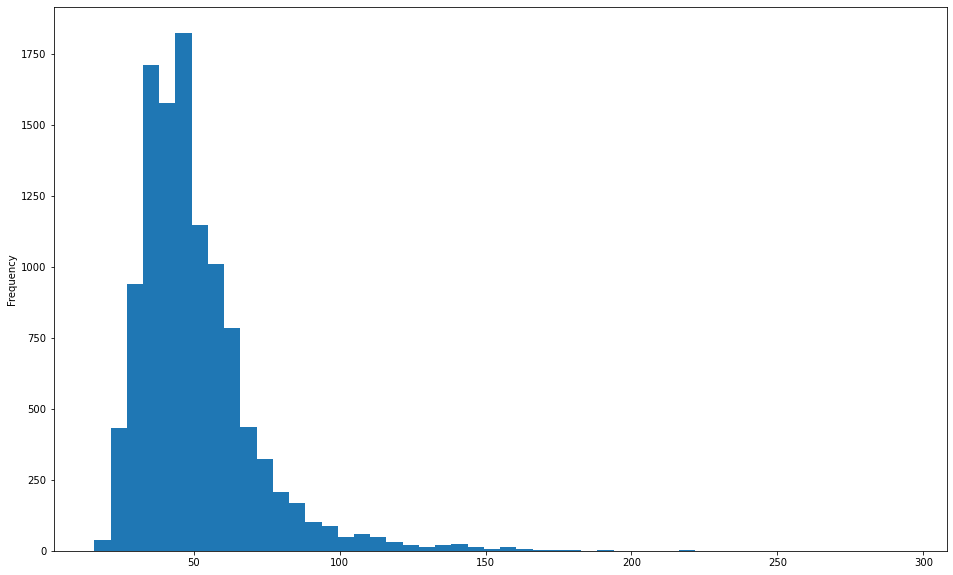

In [20]:
ax = df['x_size'].plot.hist(bins=50, figsize=(16,10))

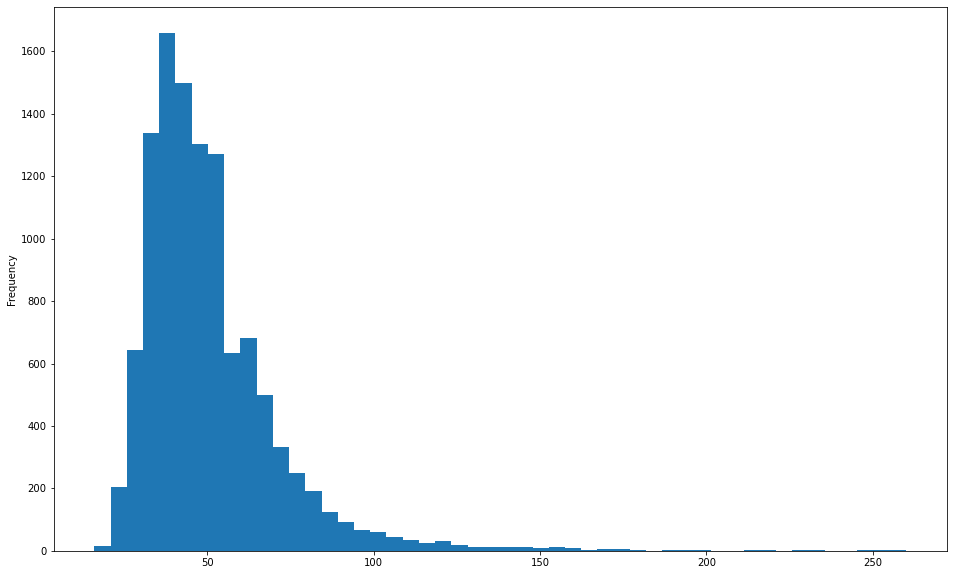

In [21]:
ax = df['y_size'].plot.hist(bins=50, figsize=(16,10))